In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as plt #Plotting lib
import seaborn as sbs # Visualization
import scipy # Stats
from sklearn.preprocessing import LabelEncoder # For encoding categorical variables
from sklearn.model_selection import train_test_split # spliting into train test
from sklearn.linear_model import LinearRegression # Linear Regression
from sklearn.metrics import mean_squared_error # MSE
from sklearn.linear_model import Ridge # Ridge regressiojn
from sklearn.linear_model import Lasso # Lasso regression
from sklearn.cross_validation import cross_val_score # Cross validation 
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory


# Any results you write to the current directory are saved as output.

C:\Users\Mudit\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
train_df = pd.read_csv('../Project_Home/Data/train.csv')
test_df = pd.read_csv('../Project_Home/Data/test.csv')

In [3]:
#Extracting Basic info about Train and Test data frame
print ('Shape of train: ' + str(train_df.shape))
print ('Shape of test: ' + str(test_df.shape))

Shape of train: (1460, 81)
Shape of test: (1459, 80)


In [4]:
train_df.columns

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish',

In [5]:
test_df.columns

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish',

In [6]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [8]:
#Delete ID Feature as it is completely useless.
del train_df['Id']
del test_df['Id']

In [9]:
#Statistics of Numerical Data
train_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


**Data Exploration **

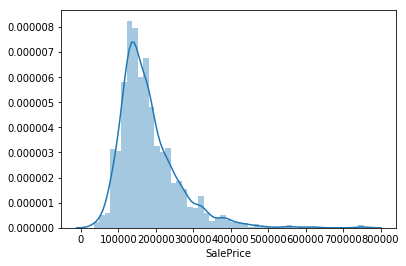

In [10]:
#Distribution of Response variable - 'Sales Price'
sbs.distplot(train_df['SalePrice'])

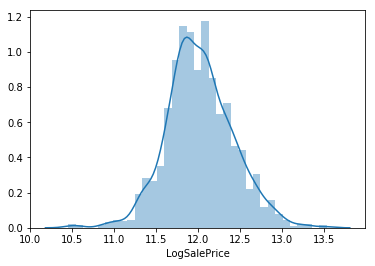

In [11]:
#As the distribution is slightly right skewed, we make it almost normal using log transformation
# But we will do it afterwards.

train_df['LogSalePrice'] = np.log(train_df['SalePrice'])
sbs.distplot(train_df.LogSalePrice)
#Much perfect normalized thing.

In [12]:
#Look for corelation between dependent variables and independent variable
corr = train_df.corr()
corr = corr['SalePrice']
corr[np.argsort(corr, axis=0)[::-1]]

SalePrice        1.000000
LogSalePrice     0.948374
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

Following are the variables with corr > 0.5, this gives some intuition of their involvement in sales price.
* SalePrice        
* OverallQual      
* GrLivArea        
* GarageCars       
* GarageArea       
* TotalBsmtSF      
* FullBath         
* 1stFlrSF         
* YearBuilt        
* YearRemodAdd     
* GarageYrBlt      
* TotRmsAbvGrd    

Following two have slightly negative coefficient of correlation, shows iverse relation with sales price.

* KitchenAbvGr    
* EnclosedPorch  

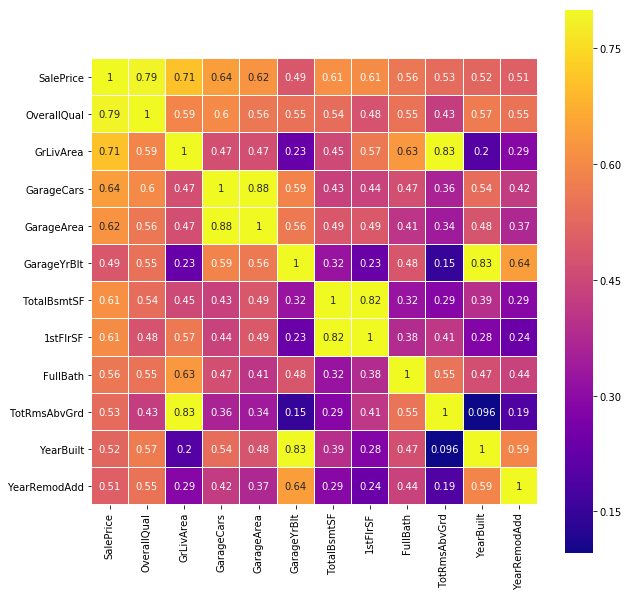

In [13]:
corrMatrix=train_df[["SalePrice","OverallQual","GrLivArea","GarageCars",
                  "GarageArea","GarageYrBlt","TotalBsmtSF","1stFlrSF","FullBath",
                  "TotRmsAbvGrd","YearBuilt","YearRemodAdd"]].corr()

plt.pyplot.figure(figsize=(10, 10))

sbs.heatmap(corrMatrix,vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='plasma',linecolor="white")

To reduce the multicollinearity, i.e. high correlation betweeen dependent variable we choose certain features from heatmap such that there is no multicollinearity while training our model.

We look at all the yellow boxes, i.e. with corr coef > 0.8. So, we find such pairs to be: 
* (TotRmsAbvGrd, GrLivArea)
* (YearBuilt, GarageYrBuilt)
* (1stFlrSF, TotalBsmntSF)
* (GarageAreas, GarageCars)

To reduce the effect of multicollinearity we will simply Remove one feature from each of the pair. (Afterwards, ofcourse.)

### Missing Value Imputation

In this we can see Only one variable(GarageyrrBlt) has null values which is to be used in training our data set, we impute these values. These are years which have to be integers for sure. Is it good to assume that Garage is  built on the same day as home? 

In [14]:
train_df[train_df['GarageYrBlt'] == train_df['YearBuilt']].OverallQual.count()

1089

1089 is quite large number of total, so we should assume that most of the garages are built with building only, so we reaplace empty values with YearBuilt.

In [15]:
train_df.GarageYrBlt.fillna(train_df['YearBuilt'], inplace= True)
test_df.GarageYrBlt.fillna(train_df['YearBuilt'], inplace= True)

In [16]:
null_columns=train_df.columns[train_df.isnull().any()]
train_df[null_columns].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

##### Lot Frontage

In [17]:
#259 Missing value, there is another feature which is related to Lot, i.e. LotArea.
# First see correlation between them
train_df[['LotArea', 'LotFrontage']].corr()

,LotArea,LotFrontage
LotArea,1.000000,0.426095
LotFrontage,0.426095,1.000000


In [18]:
#Correlation is very less, let's try with sqrt of LotArea
train_df['sqrtLotArea'] = np.sqrt(train_df['LotArea'])
test_df['sqrtLotArea'] = np.sqrt(test_df['LotArea'])

In [19]:
train_df[['sqrtLotArea', 'LotFrontage']].corr()

,sqrtLotArea,LotFrontage
sqrtLotArea,1.000000,0.602002
LotFrontage,0.602002,1.000000


In [20]:
#correlation is good, replace NAN by sqrtLotArea
train_df.LotFrontage.fillna(train_df['sqrtLotArea'], inplace = True)
test_df.LotFrontage.fillna(test_df['sqrtLotArea'], inplace = True)

### ALLEY

In [21]:
#Most of the values are Null replace by 'None'
train_df.Alley.fillna('None', inplace= True)
test_df.Alley.fillna('None', inplace= True)

#### MAS VNR TYPE AND AREA

In [22]:
cols = ['MasVnrType','MasVnrArea']
for items in cols:
    if train_df[items].dtype == 'object':
        train_df[items].fillna('None', inplace = True)
    elif train_df[items].dtype == 'float64':
        train_df[items].fillna(0.0, inplace = True)
for items in cols:
    if test_df[items].dtype == 'object':
        test_df[items].fillna('None', inplace = True)
    elif test_df[items].dtype == 'float64':
        test_df[items].fillna(0.0, inplace = True)

#### Basement

In [23]:
#Almost anything with no basement have NAN value, replace it ny None

cols =[ u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1',
       u'BsmtFinType2']

for col in cols:
    train_df[col].fillna('None', inplace = True)
for col in cols:
    test_df[col].fillna('None', inplace = True)

#### Garage

In [24]:
#Since all the cols with NAN is correcponding to houses with ni garage, we replace NAN by None
cols = ['GarageType',
'GarageFinish',
'GarageQual',
'GarageCond' ]

for col in cols:
    train_df[col].fillna('None', inplace = True)
for col in cols:
    test_df[col].fillna('None', inplace = True)
    

#### Electrical

In [25]:
# Only one value needs to fill up, so replace by mode
train_df.Electrical.fillna('SBrkr', inplace = True)
test_df.Electrical.fillna('SBrkr', inplace = True)

#### FirePlaceQu

In [26]:
train_df.FireplaceQu.fillna('None', inplace = True)
test_df.FireplaceQu.fillna('None', inplace = True)

#### Pools, Fence & Misc

In [27]:
#Pools definitely may have effect on prices. Although not much houses have pools, but for safety let us replace NAN by None
train_df.PoolQC.fillna('None', inplace= True)
train_df.Fence.fillna('None', inplace= True)
train_df.MiscFeature.fillna('None', inplace= True)
test_df.PoolQC.fillna('None', inplace= True)
test_df.Fence.fillna('None', inplace= True)
test_df.MiscFeature.fillna('None', inplace= True)

# Outlier Detection and Handling 

In [28]:
# We use tukey method i.e. anything outside IQR * 1.5 is considered outlier, but it is removing som many points 
# So we are going to use IQR * 3
def Outlier(col, train_df):
    Q3 = train_df[col].describe().iloc[6]  
    Q1 = train_df[col].describe().iloc[4]
    IQR = Q3 - Q1
    Tukey_coeff = 3*IQR
    Lower_bound = Q1 - Tukey_coeff
    Upper_bound = Q3 + Tukey_coeff
    train_df = train_df[(train_df[col] > Lower_bound) & (train_df[col] < Upper_bound)]
    return train_df

In [29]:
#We reamove Outliers from main numeric data which influence our model
col = ["SalePrice","OverallQual","GrLivArea","GarageCars",
                  "GarageArea","GarageYrBlt","TotalBsmtSF","1stFlrSF","FullBath",
                  "TotRmsAbvGrd"]
for cols in col:
    train_df = Outlier(cols, train_df)

In [30]:
print (train_df.shape)
print (test_df.shape)

(1440, 82)
(1459, 80)


## Effect of different features on Sale Price


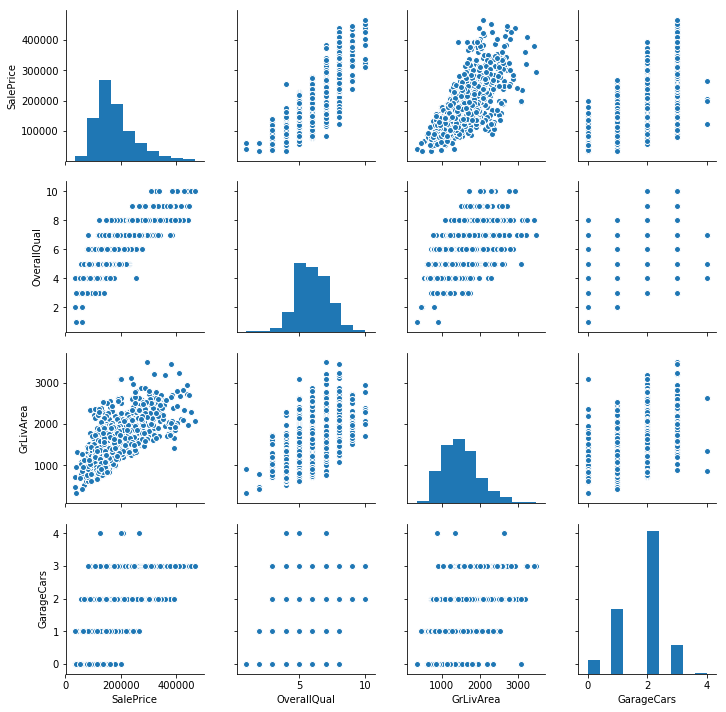

In [31]:
sbs.pairplot(train_df[col[0:4]])

* POlynomial or quadratic relationship can be seen b/w Overall Quality and sales price.
* Linear relationship between GrLivArea and Sales Price
* Median of sales price also increases with in GragesCars
* Most garages have capacity of 2

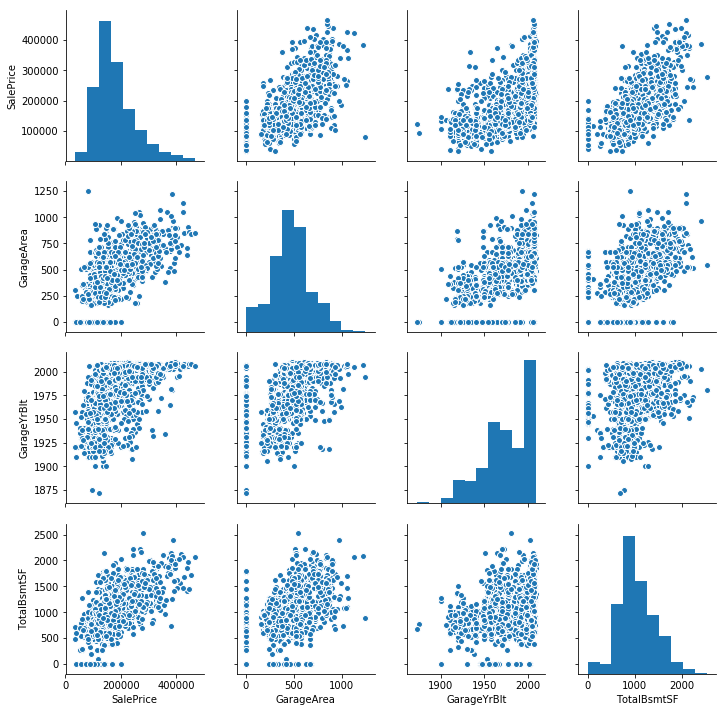

In [32]:
sbs.pairplot(train_df[['SalePrice', "GarageArea","GarageYrBlt","TotalBsmtSF"]])

* Salesprice increases with Garage area and BsmntSF, almost linearly.
* Prices increase quadrartically as newly constructed the house is.
* Building garages became more popular as passage of time.

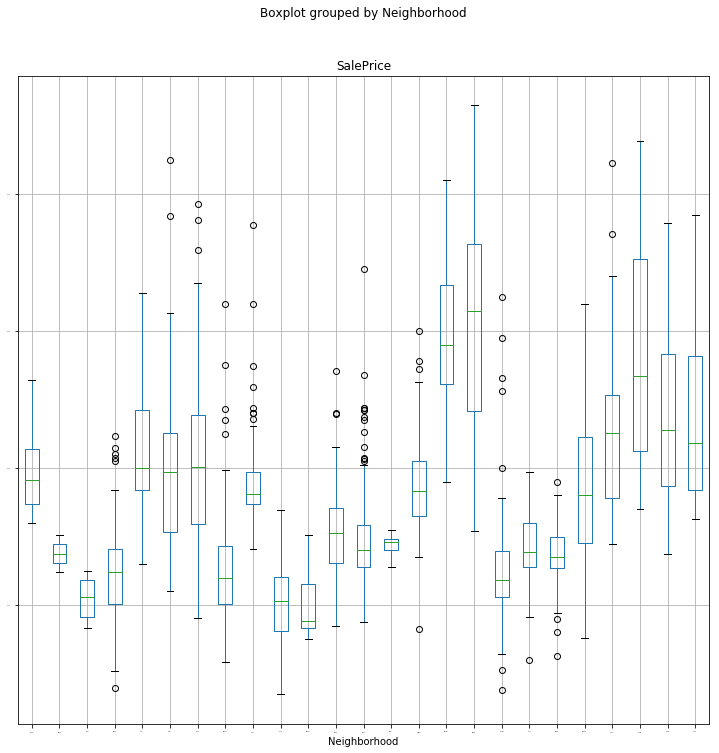

In [33]:
plt.pyplot.figure(figsize = (20,20))
train_df.boxplot(column='SalePrice', by = 'Neighborhood', figsize = (12,12), fontsize = 0.5)

## few nbd have really high prices of property, so must use nbd in our modeling.

In [34]:
#catg_var = train_df.dtypes[train_df.dtypes == "object"].index
#for catg in list(catg_var) :
#    bp = train_df.boxplot(column=['LogSalePrice'], by=[catg])

Upon seeing the relationship between categorical and sale prices, we can see that few cat. variables have very much impact 
on sale price so we will use only those features in our analysis.: 
    
'Neighborhood', 'Condition2', 'MasVnrType', 'ExterQual', 'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType'

### Encoding Categorical variables to numerical

In [35]:
cat = ['Neighborhood', 'Condition2', 'MasVnrType', 'ExterQual', 'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType']
lb_make = LabelEncoder()
for col in cat:
    train_df["num" + col] = lb_make.fit_transform(train_df[col].astype(str))
for col in cat:
    test_df["num" + col] = lb_make.fit_transform(test_df[col].astype(str))

In [36]:
print (train_df.shape)
print (test_df.shape)

(1440, 91)
(1459, 89)


In [37]:
#correlation between categorical and target variable
cat = ['Neighborhood', 'Condition2', 'MasVnrType', 'ExterQual', 'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType']
numcat = ['num'+item for item in cat]
numcat.append('LogSalePrice')
corr = train_df[numcat].corr()

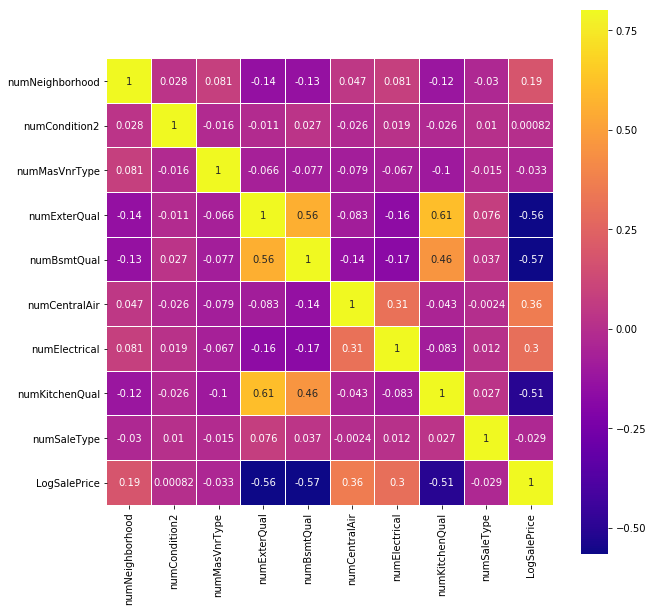

In [38]:
plt.pyplot.figure(figsize=(10, 10))
sbs.heatmap(corr,vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='plasma',linecolor="white")

* numExterQual, numBsmtQual, numKitchenQual are highly related to sales price, but all of the are correlated to each other also so we only use one of them to reduce multicollinearity.
* numCentralAir is also related and will be used for model training.

In [39]:
#Total Columns which we are considering for model evaluation:
hero_col = ["OverallQual","GrLivArea",
                  "GarageArea","TotalBsmtSF","FullBath",
                  "YearBuilt","YearRemodAdd","numKitchenQual", 'numCentralAir','numNeighborhood', 'LogSalePrice']

In [40]:
X = train_df[hero_col[:-1]]
y = train_df[hero_col[-1]]
X_maintest = test_df[hero_col[:-1]]
X_maintest.dropna(inplace=True)

C:\Users\Mudit\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [41]:
# Test train split of train_df
X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, random_state=42, test_size=.33)

## OLR, ordinary linear regression.

In [42]:
model = LinearRegression()
lr = model.fit(X_train, y_train)
b = lr.score(X_test, y_test)  
print ('R^2 error is %s.'% b)
mean_s_e = mean_squared_error(lr.predict(X_test), y_test)
print ('MSE is %s.' % mean_s_e)

R^2 error is 0.8673900192094082.
MSE is 0.020878683847696235.


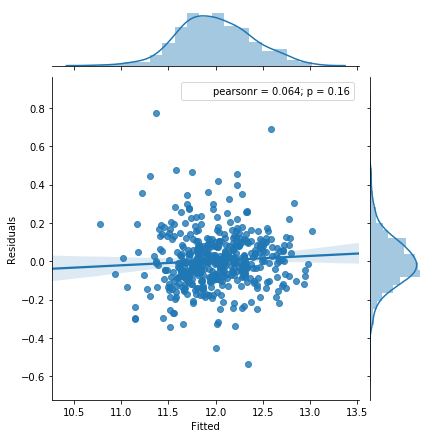

In [43]:
residuals = lr.predict(X_test) - y_test
fig = sbs.jointplot( lr.predict(X_test), residuals,kind='reg')
fig.set_axis_labels('Fitted','Residuals')

* Error is almost normally distributed.
* No pattern observed, whatsover. No transformation needed.
* Plot is not funnel shapped, Heteroskedasticity is not there.

### Using Cross validation to see possible overfitting

In [44]:
#New Model training which will include all the observation for training.
New_lr = LinearRegression()
New_model = New_lr.fit(X,y)
scores = cross_val_score(New_lr, X, y , cv =10, scoring= 'r2')
#SE_scores = - cross_val_score(New_lr, X, y, cv =10, scoring= 'mean_squared_error')
print ('Mean of all the R^2 error after 10 folds of CV is %s.'% scores.mean())
#rint 'Mean of MSE after 10 folds of CV is %s.' % MSE_scores.mean()

Mean of all the R^2 error after 10 folds of CV is 0.8504067088514817.


##### Ridge Regression, finding optimal parameter of ridge regression using MSE


R2 Error for alpha = 0.01 is 0.8673905394654845


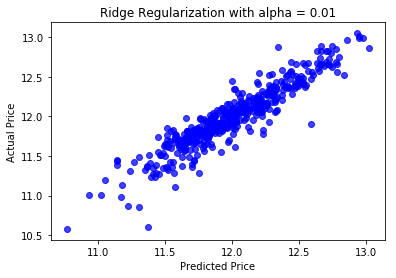

R2 Error for alpha = 0.1 is 0.8673951728279725


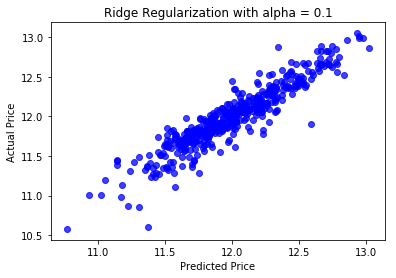

R2 Error for alpha = 1 is 0.867436849019098


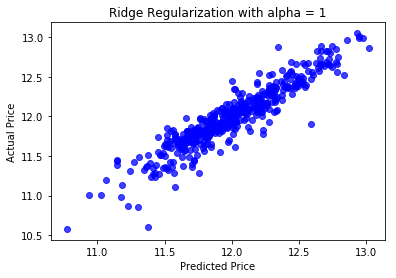

R2 Error for alpha = 10 is 0.8675284888773389


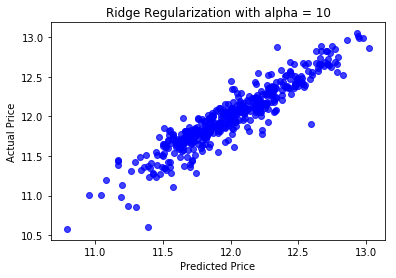

R2 Error for alpha = 100 is 0.8646724633543603


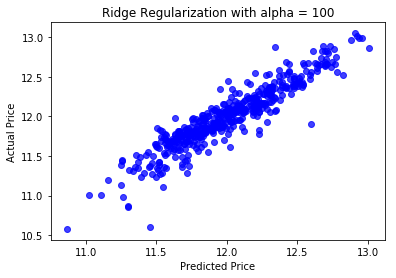

In [45]:
R2 = []
alphas = []
mse = []
for i in range (-2,3):
    alpha = 10**i      # Range of alphas 
    rm = Ridge(alpha=alpha)   
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)    #Training and predicting Ridge model
    plt.pyplot.scatter(preds_ridge, y_test, alpha=.75, color='b')
    plt.pyplot.xlabel('Predicted Price')
    plt.pyplot.ylabel('Actual Price')
    plt.pyplot.title('Ridge Regularization with alpha = {}'.format(alpha))    #Plotting actual vs predicted price for difft alphas
    R2.append(rm.score(X_test, y_test))
    mse.append(mean_squared_error(y_test, preds_ridge))
    #rmse = np.sqrt(mse)
    alphas.append(alpha)
    print ('R2 Error for alpha = %s is %s'%(alpha, rm.score(X_test, y_test)))
    plt.pyplot.show()

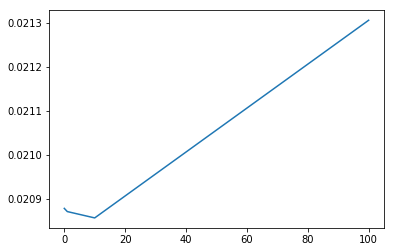

In [46]:
plt.pyplot.plot(alphas, mse)

##### Minimized MSE is at 10.. So, value of alpha can be choosen to be 10.

Lasso Regression 

R2 Error for alpha = 1e-05 is 0.8673971012709979


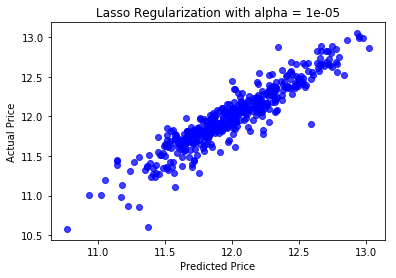

R2 Error for alpha = 0.0001 is 0.8674586884946037


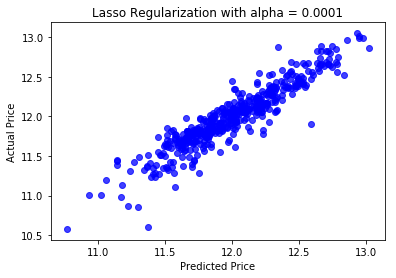

R2 Error for alpha = 0.001 is 0.8678555575247118


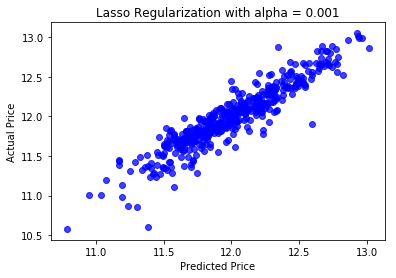

R2 Error for alpha = 0.01 is 0.859309928921876


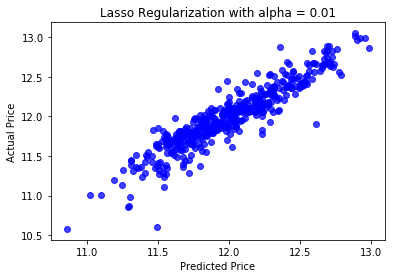

R2 Error for alpha = 0.1 is 0.8331201611936836


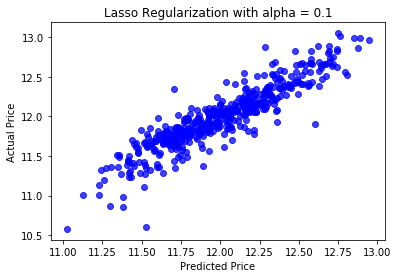

R2 Error for alpha = 1 is 0.8305925678237115


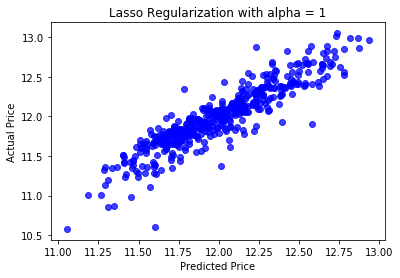

R2 Error for alpha = 10 is 0.7441943916900217


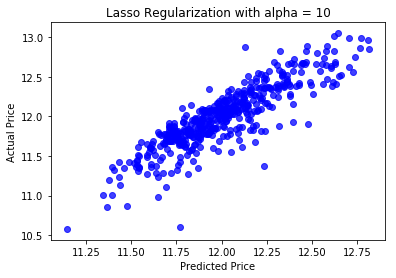

R2 Error for alpha = 100 is 0.16475715723151552


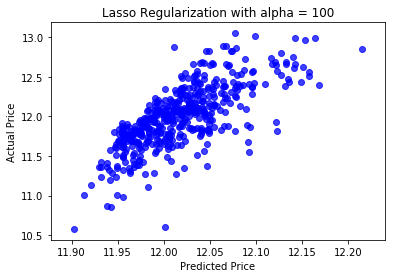

[0.8673971012709979,
 0.8674586884946037,
 0.8678555575247118,
 0.859309928921876,
 0.8331201611936836,
 0.8305925678237115,
 0.7441943916900217,
 0.16475715723151552]

In [47]:
R2 = []
alphas = []
mse = []
for i in range (-5,3):
    alpha = 10**i
    ls = Lasso(alpha=alpha)
    lasso_model = ls.fit(X_train, y_train)
    preds_lasso = lasso_model.predict(X_test)
    plt.pyplot.scatter(preds_lasso, y_test, alpha=.75, color='b')
    plt.pyplot.xlabel('Predicted Price')
    plt.pyplot.ylabel('Actual Price')
    plt.pyplot.title('Lasso Regularization with alpha = {}'.format(alpha))
    R2.append(ls.score(X_test, y_test))
    mse.append(mean_squared_error(y_test, preds_lasso))
    #rmse = np.sqrt(mse)
    alphas.append(alpha)
    print ('R2 Error for alpha = %s is %s'%(alpha, ls.score(X_test, y_test)))
    plt.pyplot.show()
R2

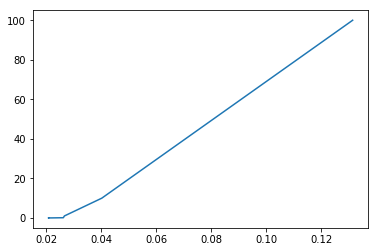

In [48]:
plt.pyplot.plot(mse, alphas)

### MInimum of MSE can be found at alpha = 0.001

#### Ridge Regression CV with alpha = 10

In [49]:
New_Ridge_lr = Ridge(alpha = 10)
New_model = New_Ridge_lr.fit(X,y)
scores = cross_val_score(New_Ridge_lr, X, y , cv =10, scoring= 'r2')
#SE_scores = - cross_val_score(New_lr, X, y, cv =10, scoring= 'mean_squared_error')
print ('Mean of all the R^2 error after 10 folds of CV is %s.'% scores.mean())
#rint 'Mean of MSE after 10 folds of CV is %s.' % MSE_scores.mean()

Mean of all the R^2 error after 10 folds of CV is 0.8502065922512868.


#### Lasso Regression CV with alpha = 0.001

In [50]:
New_Lasso_lr = Lasso(alpha = 0.001)
New_model = New_Lasso_lr.fit(X,y)
scores = cross_val_score(New_Lasso_lr, X, y , cv =10, scoring= 'r2')
#SE_scores = - cross_val_score(New_lr, X, y, cv =10, scoring= 'mean_squared_error')
print ('Mean of all the R^2 error after 10 folds of CV is %s.'% scores.mean())
#rint 'Mean of MSE after 10 folds of CV is %s.' % MSE_scores.mean()

Mean of all the R^2 error after 10 folds of CV is 0.8501532184940401.


## We've transformed sale prices using log transformation. Make sure to invert the prediction using np.log() transformation to get original scores.